In [1]:
import json
from collections import Counter 

import pandas as pd

from sklearn.model_selection import train_test_split

import re

# Sypmtoms

release_evidences.json


In [3]:
with open('Data/release_evidences.json') as f:
    symptom_questions = json.load(f)
    
for z in symptom_questions:
    print(symptom_questions[z])
    break


{'name': 'E_91', 'code_question': 'E_91', 'question_fr': 'Avez-vous objectivé ou ressenti de la fièvre?', 'question_en': 'Do you have a fever (either felt or measured with a thermometer)?', 'is_antecedent': False, 'default_value': 0, 'value_meaning': {}, 'possible-values': [], 'data_type': 'B'}


In [3]:
f.close()

In [4]:
del(f)

In [5]:
for z in symptom_questions:
    del symptom_questions[z]['name']
    del symptom_questions[z]['code_question']
    del symptom_questions[z]['question_fr']
    del symptom_questions[z]['is_antecedent']

In [6]:

for z in symptom_questions:
    print(z, symptom_questions[z])
    break

E_91 {'question_en': 'Do you have a fever (either felt or measured with a thermometer)?', 'default_value': 0, 'value_meaning': {}, 'possible-values': [], 'data_type': 'B'}


In [7]:
""" V_123, V_11, V_10 """
null_response = ['V_123', 'V_11', 'V_10', 0]


In [8]:
symptom_response_type = {}
response_type = ""

for key, value in symptom_questions.items():
    if value['data_type'] == 'B':
        response_type = 'B'
    elif value['data_type'] == 'C':
        response_type = 'C'
    else:
        response_type = 'M'
        
    symptom_response_type[key] = response_type
    
#count of each response type

print(Counter(symptom_response_type.values()))


Counter({'B': 208, 'C': 10, 'M': 5})


In [9]:
response_B = []
response_C = []
response_M = []

for key, value in symptom_response_type.items():
    if value == 'B':
        response_B.append(key)
    elif value == 'C':
        response_C.append(key)
    else:
        response_M.append(key)

In [10]:
evidence_list = []

In [11]:
def are_all_elements_int(lst):
    return all(isinstance(i, int) for i in lst)

In [12]:
for i in response_M:
    for j in symptom_questions[i]['possible-values']:
        if j not in null_response:
            evidence_list.append(i+'_@_'+j)

In [13]:
response_num = []

In [14]:
for i in response_C:
    if are_all_elements_int(symptom_questions[i]['possible-values']):
        evidence_list.append(i)
        response_num.append(i)
    else:
        for j in symptom_questions[i]['possible-values']:
            if j not in null_response:
                evidence_list.append(i+'_@_'+str(j))
        

In [15]:
response_num

['E_59', 'E_56', 'E_58', 'E_134', 'E_132', 'E_136']

In [16]:
evidence_list = evidence_list + response_B


In [17]:
len(evidence_list)

903

In [18]:
symptom_questions_dict = {}

for key, value in symptom_questions.items():
    symptom_questions_dict[key] = value['question_en']

len(symptom_questions_dict)


223

In [19]:
symptom_questions_list = list(symptom_questions_dict.keys())
symptom_questions_list.sort()

c=0
for key, value in symptom_questions_dict.items():
    print(key, value)
    c+=1
    if c==5:
        break


E_91 Do you have a fever (either felt or measured with a thermometer)?
E_55 Do you feel pain somewhere?
E_53 Do you have pain somewhere, related to your reason for consulting?
E_57 Does the pain radiate to another location?
E_54 Characterize your pain:


In [20]:
del(c, z)

# Data

In [21]:
data = pd.read_csv('Data/release_train_patients.csv')

In [22]:
data.shape

(1025602, 6)

In [23]:
data.head()

,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,18,"[['Bronchitis', 0.19171203430383882], ['Pneumo...",M,URTI,"['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54...",E_91
1,21,"[['HIV (initial infection)', 0.518950056440760...",M,HIV (initial infection),"['E_9', 'E_27', 'E_50', 'E_51', 'E_53', 'E_54_...",E_50
2,19,"[['Bronchitis', 0.11278064619119596], ['Pneumo...",F,Pneumonia,"['E_53', 'E_54_@_V_179', 'E_54_@_V_192', 'E_55...",E_77
3,34,"[['URTI', 0.23859396799565236], ['Cluster head...",F,URTI,"['E_48', 'E_53', 'E_54_@_V_183', 'E_55_@_V_89'...",E_53
4,36,"[['URTI', 0.23677812769175735], ['Influenza', ...",M,URTI,"['E_49', 'E_50', 'E_53', 'E_54_@_V_183', 'E_55...",E_201


In [24]:
data = data.drop(['DIFFERENTIAL_DIAGNOSIS'], axis=1)
data = data.drop(['INITIAL_EVIDENCE'], axis=1)

data.head()

,AGE,SEX,PATHOLOGY,EVIDENCES
0,18,M,URTI,"['E_48', 'E_50', 'E_53', 'E_54_@_V_161', 'E_54..."
1,21,M,HIV (initial infection),"['E_9', 'E_27', 'E_50', 'E_51', 'E_53', 'E_54_..."
2,19,F,Pneumonia,"['E_53', 'E_54_@_V_179', 'E_54_@_V_192', 'E_55..."
3,34,F,URTI,"['E_48', 'E_53', 'E_54_@_V_183', 'E_55_@_V_89'..."
4,36,M,URTI,"['E_49', 'E_50', 'E_53', 'E_54_@_V_183', 'E_55..."


In [25]:
data.shape

(1025602, 4)

In [26]:
#count of each pathology

pathology_count = Counter(data['PATHOLOGY'])
pathology_count = dict(sorted(pathology_count.items(), key=lambda item: item[1], reverse=True))
pathology_count

{'URTI': 64368,
 'Viral pharyngitis': 61642,
 'Anemia': 50665,
 'HIV (initial infection)': 29013,
 'Localized edema': 27825,
 'Anaphylaxis': 27718,
 'Pulmonary embolism': 27468,
 'Influenza': 26812,
 'Bronchitis': 26400,
 'Allergic sinusitis': 26203,
 'Acute dystonic reactions': 25982,
 'GERD': 25979,
 'Acute otitis media': 25917,
 'Pneumonia': 25761,
 'Panic attack': 25019,
 'Acute laryngitis': 24129,
 'Guillain-Barré syndrome': 22867,
 'Pericarditis': 22785,
 'Sarcoidosis': 21285,
 'Possible NSTEMI / STEMI': 21260,
 'Unstable angina': 21244,
 'Atrial fibrillation': 21036,
 'Cluster headache': 20804,
 'Chronic rhinosinusitis': 20579,
 'Inguinal hernia': 20235,
 'Bronchospasm / acute asthma exacerbation': 19875,
 'Acute pulmonary edema': 19018,
 'Pancreatic neoplasm': 18846,
 'Bronchiectasis': 18795,
 'PSVT': 18781,
 'Myasthenia gravis': 18566,
 'Scombroid food poisoning': 18535,
 'Acute COPD exacerbation / infection': 17661,
 'Epiglottitis': 17209,
 'Stable angina': 16995,
 'Tuberculo

In [27]:
#get a list of pathologies with count less than 1000

pathology_count_1 = {k: v for k, v in pathology_count.items() if v < 1000}
pathology_count_2 = {k: v for k, v in pathology_count.items() if (v < 10000) and (v >= 1000)}
pathology_count_3 = {k: v for k, v in pathology_count.items() if (v > 10000) and (v < 30000)}
pathology_count_4 = {k: v for k, v in pathology_count.items() if v > 30000}

In [28]:
pathology_count_1, pathology_count_2, pathology_count_3, pathology_count_4

({'Ebola': 718, 'Bronchiolitis': 261},
 {'Chagas': 9252,
  'Whooping cough': 6070,
  'Spontaneous rib fracture': 5712,
  'Croup': 2852},
 {'HIV (initial infection)': 29013,
  'Localized edema': 27825,
  'Anaphylaxis': 27718,
  'Pulmonary embolism': 27468,
  'Influenza': 26812,
  'Bronchitis': 26400,
  'Allergic sinusitis': 26203,
  'Acute dystonic reactions': 25982,
  'GERD': 25979,
  'Acute otitis media': 25917,
  'Pneumonia': 25761,
  'Panic attack': 25019,
  'Acute laryngitis': 24129,
  'Guillain-Barré syndrome': 22867,
  'Pericarditis': 22785,
  'Sarcoidosis': 21285,
  'Possible NSTEMI / STEMI': 21260,
  'Unstable angina': 21244,
  'Atrial fibrillation': 21036,
  'Cluster headache': 20804,
  'Chronic rhinosinusitis': 20579,
  'Inguinal hernia': 20235,
  'Bronchospasm / acute asthma exacerbation': 19875,
  'Acute pulmonary edema': 19018,
  'Pancreatic neoplasm': 18846,
  'Bronchiectasis': 18795,
  'PSVT': 18781,
  'Myasthenia gravis': 18566,
  'Scombroid food poisoning': 18535,
  'A

In [29]:
#remove pathologies with count less than 1000

data1 = data[data['PATHOLOGY'].isin(pathology_count_1.keys())]

data2 = data[data['PATHOLOGY'].isin(pathology_count_2.keys())]

data3 = data[data['PATHOLOGY'].isin(pathology_count_3.keys())]

data4 = data[data['PATHOLOGY'].isin(pathology_count_4.keys())]

In [30]:
data1.shape, data2.shape, data3.shape, data4.shape

((979, 4), (23886, 4), (824062, 4), (176675, 4))

In [31]:
data_1 = data1

data_2, a = train_test_split(data2, train_size=0.7, stratify=data2['PATHOLOGY'], random_state=42)

data_3, a = train_test_split(data3, train_size=0.6, stratify=data3['PATHOLOGY'], random_state=42)

data_4, a = train_test_split(data4, train_size=0.4, stratify=data4['PATHOLOGY'], random_state=42)

In [32]:
del(data1, data2, data3, data4, a)

In [33]:
data_1.shape, data_2.shape, data_3.shape, data_4.shape, data_1.shape[0] + data_2.shape[0] + data_3.shape[0]+ data_4.shape[0]

((979, 4), (16720, 4), (494437, 4), (70670, 4), 582806)

In [34]:
#compare the distribution of pathologies

Counter(data_1['PATHOLOGY']), Counter(data_2['PATHOLOGY']), Counter(data_3['PATHOLOGY']), Counter(data_4['PATHOLOGY'])

(Counter({'Ebola': 718, 'Bronchiolitis': 261}),
 Counter({'Chagas': 6476,
          'Whooping cough': 4249,
          'Spontaneous rib fracture': 3998,
          'Croup': 1997}),
 Counter({'HIV (initial infection)': 17408,
          'Localized edema': 16695,
          'Anaphylaxis': 16631,
          'Pulmonary embolism': 16481,
          'Influenza': 16087,
          'Bronchitis': 15840,
          'Allergic sinusitis': 15722,
          'Acute dystonic reactions': 15589,
          'GERD': 15587,
          'Acute otitis media': 15550,
          'Pneumonia': 15457,
          'Panic attack': 15011,
          'Acute laryngitis': 14477,
          'Guillain-Barré syndrome': 13720,
          'Pericarditis': 13671,
          'Sarcoidosis': 12771,
          'Possible NSTEMI / STEMI': 12756,
          'Unstable angina': 12746,
          'Atrial fibrillation': 12622,
          'Cluster headache': 12482,
          'Chronic rhinosinusitis': 12347,
          'Inguinal hernia': 12141,
          'Bronc

In [35]:
data_n = pd.concat([data_1, data_2, data_3, data_4], axis=0)

In [36]:
del(data_1, data_2, data_3, data_4)

In [37]:
#sort the data by pathology count

pathology_count = Counter(data_n['PATHOLOGY'])
pathology_count = dict(sorted(pathology_count.items(), key=lambda item: item[1], reverse=True))

pathology_count

{'URTI': 25747,
 'Viral pharyngitis': 24657,
 'Anemia': 20266,
 'HIV (initial infection)': 17408,
 'Localized edema': 16695,
 'Anaphylaxis': 16631,
 'Pulmonary embolism': 16481,
 'Influenza': 16087,
 'Bronchitis': 15840,
 'Allergic sinusitis': 15722,
 'Acute dystonic reactions': 15589,
 'GERD': 15587,
 'Acute otitis media': 15550,
 'Pneumonia': 15457,
 'Panic attack': 15011,
 'Acute laryngitis': 14477,
 'Guillain-Barré syndrome': 13720,
 'Pericarditis': 13671,
 'Sarcoidosis': 12771,
 'Possible NSTEMI / STEMI': 12756,
 'Unstable angina': 12746,
 'Atrial fibrillation': 12622,
 'Cluster headache': 12482,
 'Chronic rhinosinusitis': 12347,
 'Inguinal hernia': 12141,
 'Bronchospasm / acute asthma exacerbation': 11925,
 'Acute pulmonary edema': 11411,
 'Pancreatic neoplasm': 11308,
 'Bronchiectasis': 11277,
 'PSVT': 11269,
 'Myasthenia gravis': 11140,
 'Scombroid food poisoning': 11121,
 'Acute COPD exacerbation / infection': 10597,
 'Epiglottitis': 10325,
 'Stable angina': 10197,
 'Tuberculo

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

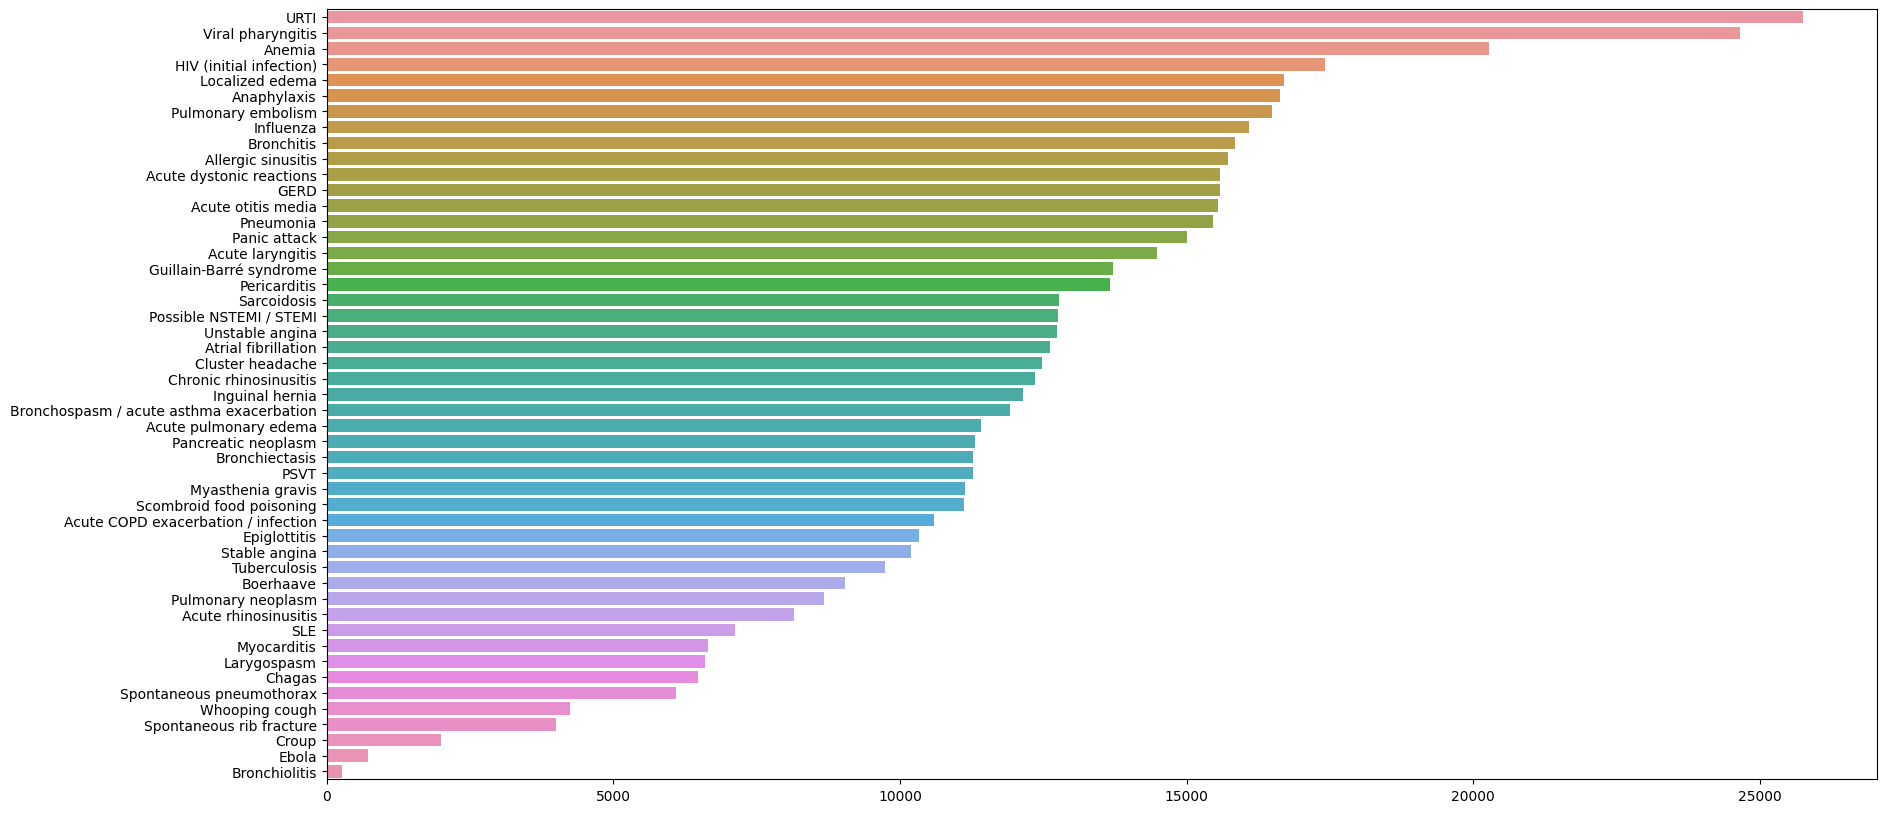

In [39]:
#plot the distribution of pathologies

plt.figure(figsize=(20, 10))
sns.barplot(x=list(pathology_count.values()), y=list(pathology_count.keys()))

In [40]:
pct_dist = data_n['PATHOLOGY'].value_counts(normalize=True)
pct_dist = pct_dist * 100
pct_dist

PATHOLOGY
URTI                                        4.417765
Viral pharyngitis                           4.230739
Anemia                                      3.477315
HIV (initial infection)                     2.986929
Localized edema                             2.864590
Anaphylaxis                                 2.853608
Pulmonary embolism                          2.827871
Influenza                                   2.760267
Bronchitis                                  2.717886
Allergic sinusitis                          2.697639
Acute dystonic reactions                    2.674818
GERD                                        2.674475
Acute otitis media                          2.668126
Pneumonia                                   2.652169
Panic attack                                2.575643
Acute laryngitis                            2.484017
Guillain-Barré syndrome                     2.354128
Pericarditis                                2.345721
Sarcoidosis                         

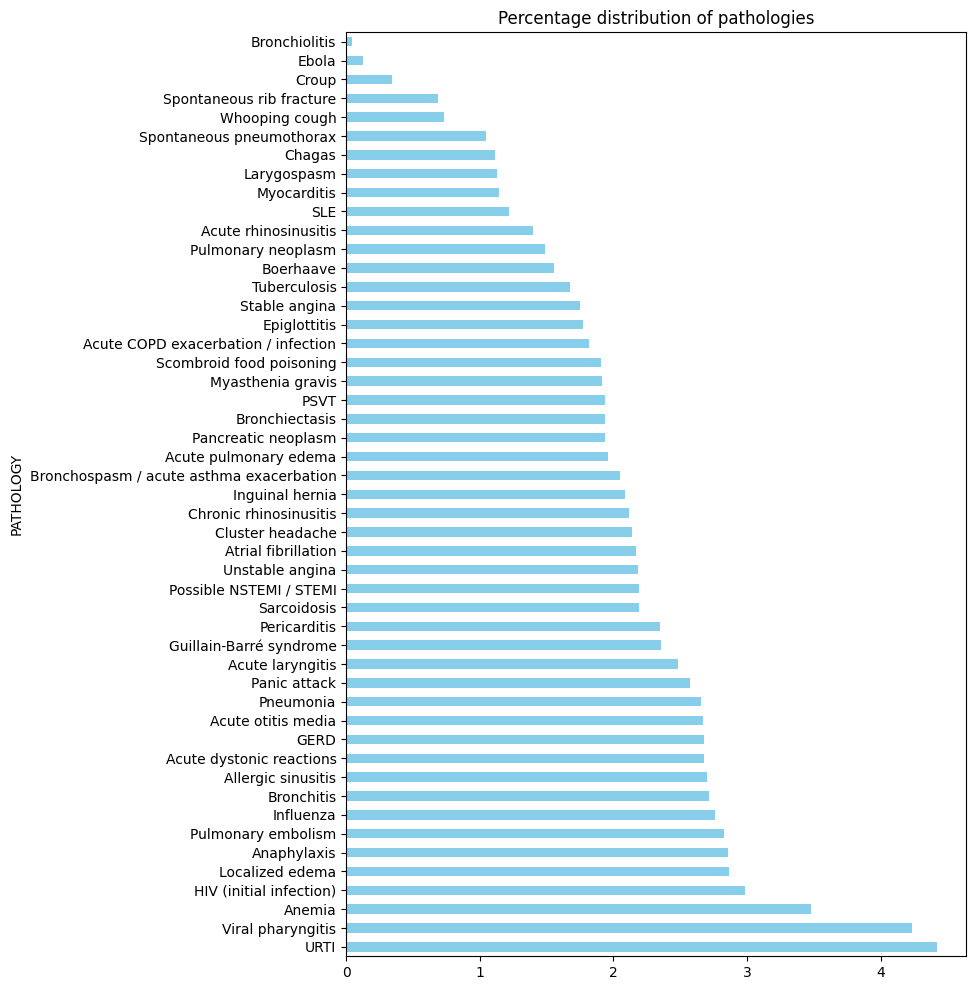

In [41]:
ax = pct_dist.plot(kind='barh', 
                   title='Percentage distribution of pathologies', 
                   figsize=(8, 12), 
                   color='skyblue')

In [42]:
data_n.isnull().sum()


AGE          0
SEX          0
PATHOLOGY    0
EVIDENCES    0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AGE', ylabel='AGE'>

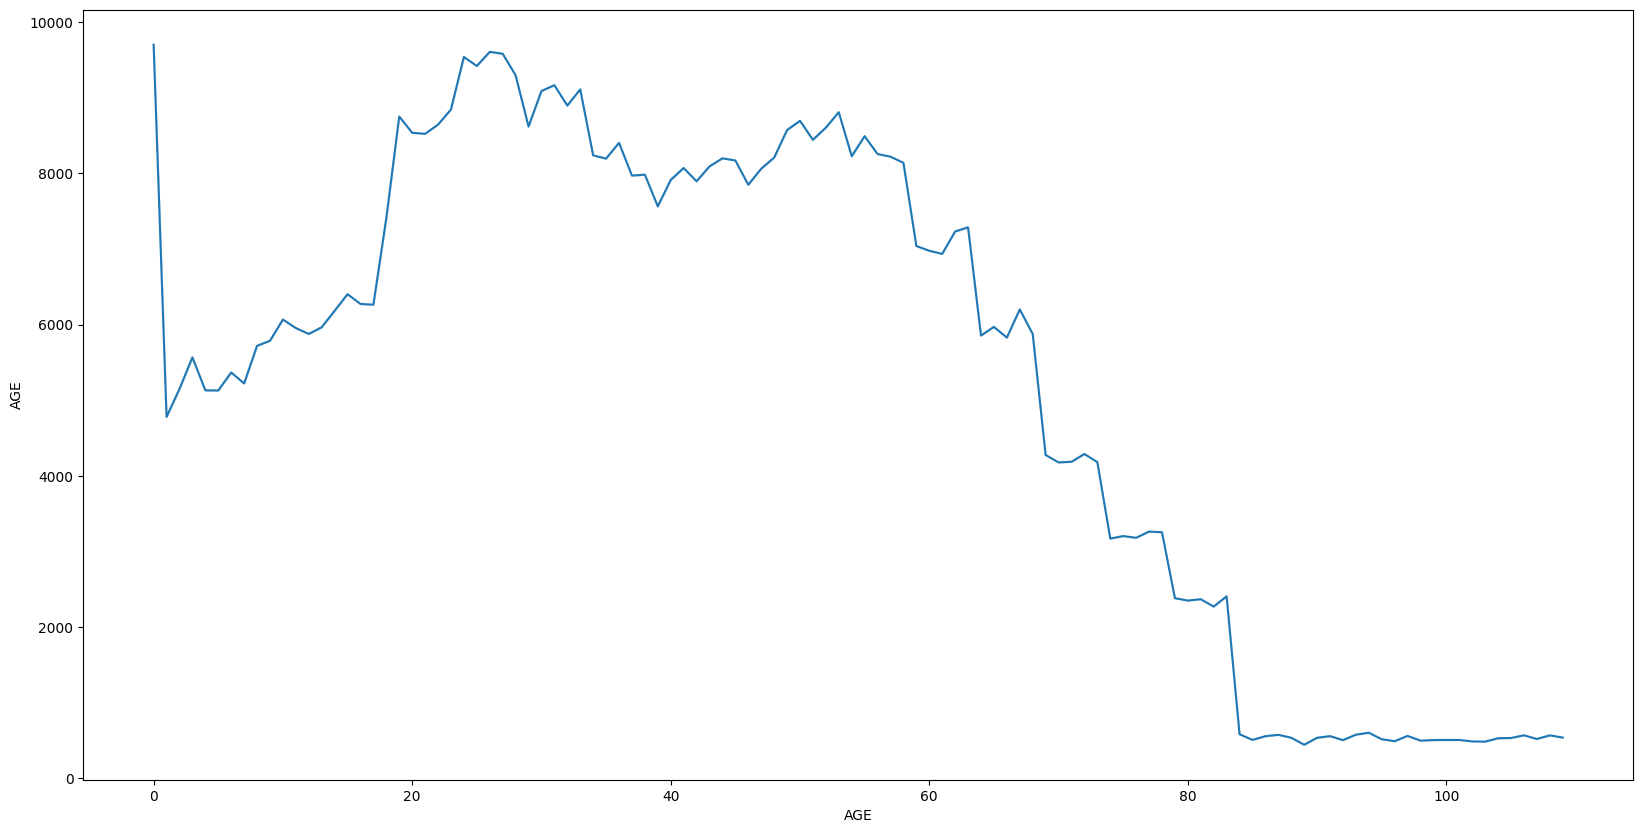

In [43]:
#plot line chart for age and count of age values
plt.figure(figsize=(20, 10))
sns.lineplot(x='AGE', y='AGE', data=data_n, estimator=lambda x: len(x))


# New Dataset

In [44]:
data = data_n
del(data_n)

In [70]:
data.reset_index(drop=True, inplace=True)

data.head()

,AGE,SEX,PATHOLOGY,EVIDENCES
0,21,M,Ebola,"[E_39, E_41, E_66, E_73, E_89, E_91, E_144, E_..."
1,0,M,Bronchiolitis,"[E_66, E_91, E_181, E_195, E_201, E_204_@_V_10]"
2,64,M,Ebola,"[E_39, E_41, E_73, E_144, E_148, E_201, E_204_..."
3,0,M,Bronchiolitis,"[E_23, E_32, E_66, E_91, E_142, E_181, E_183, ..."
4,32,F,Ebola,"[E_39, E_41, E_51, E_66, E_89, E_97, E_148, E_..."


In [45]:
df = pd.DataFrame(columns=[evidence_list])
df

,E_55_@_V_14,E_55_@_V_15,E_55_@_V_16,E_55_@_V_17,E_55_@_V_18,E_55_@_V_19,E_55_@_V_20,E_55_@_V_21,E_55_@_V_22,E_55_@_V_23,...,E_200,E_199,E_121,E_120,E_142,E_195,E_183,E_224,E_223,E_5


In [46]:
df['AGE'] = data['AGE']
df['SEX'] = data['SEX'].replace({'M': True, 'F': False})
df['PATHOLOGY'] = data['PATHOLOGY']

/tmp/ipykernel_33/2078587980.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SEX'] = data['SEX'].replace({'M': True, 'F': False})


In [47]:
df.reset_index(drop=True, inplace=True)

In [48]:
df.shape

(582806, 906)

In [49]:
df.head()

,E_55_@_V_14,E_55_@_V_15,E_55_@_V_16,E_55_@_V_17,E_55_@_V_18,E_55_@_V_19,E_55_@_V_20,E_55_@_V_21,E_55_@_V_22,E_55_@_V_23,...,E_120,E_142,E_195,E_183,E_224,E_223,E_5,AGE,SEX,PATHOLOGY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,True,Ebola
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,Bronchiolitis
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,True,Ebola
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,True,Bronchiolitis
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,False,Ebola


In [50]:
data.head()

,AGE,SEX,PATHOLOGY,EVIDENCES
1270,21,M,Ebola,"['E_39', 'E_41', 'E_66', 'E_73', 'E_89', 'E_91..."
1368,0,M,Bronchiolitis,"['E_66', 'E_91', 'E_181', 'E_195', 'E_201', 'E..."
1907,64,M,Ebola,"['E_39', 'E_41', 'E_73', 'E_144', 'E_148', 'E_..."
2572,0,M,Bronchiolitis,"['E_23', 'E_32', 'E_66', 'E_91', 'E_142', 'E_1..."
3894,32,F,Ebola,"['E_39', 'E_41', 'E_51', 'E_66', 'E_89', 'E_97..."


In [51]:
pattern = r"_@_\d+$"

In [52]:
df = df.fillna(False)

/tmp/ipykernel_33/302330419.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [53]:
for i in response_num:
    df[i] = df[i].astype(int)
    

In [73]:
df.head(10)

,E_55_@_V_14,E_55_@_V_15,E_55_@_V_16,E_55_@_V_17,E_55_@_V_18,E_55_@_V_19,E_55_@_V_20,E_55_@_V_21,E_55_@_V_22,E_55_@_V_23,...,E_120,E_142,E_195,E_183,E_224,E_223,E_5,AGE,SEX,PATHOLOGY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,21,True,Ebola
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,True,Bronchiolitis
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,64,True,Ebola
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,0,True,Bronchiolitis
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,32,False,Ebola
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,True,Ebola
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,44,True,Ebola
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3,False,Ebola
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,30,True,Ebola
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,23,True,Ebola


In [55]:
data['EVIDENCES'] = data['EVIDENCES'].str.replace("'", "").str.strip('][').str.split(', ')


In [74]:
data.head()

,AGE,SEX,PATHOLOGY,EVIDENCES
0,21,M,Ebola,"[E_39, E_41, E_66, E_73, E_89, E_91, E_144, E_..."
1,0,M,Bronchiolitis,"[E_66, E_91, E_181, E_195, E_201, E_204_@_V_10]"
2,64,M,Ebola,"[E_39, E_41, E_73, E_144, E_148, E_201, E_204_..."
3,0,M,Bronchiolitis,"[E_23, E_32, E_66, E_91, E_142, E_181, E_183, ..."
4,32,F,Ebola,"[E_39, E_41, E_51, E_66, E_89, E_97, E_148, E_..."


In [72]:
data['EVIDENCES'][0]

['E_39',
 'E_41',
 'E_66',
 'E_73',
 'E_89',
 'E_91',
 'E_144',
 'E_148',
 'E_178',
 'E_201',
 'E_204_@_V_1']

In [75]:
try:
    for i in range(len(data['EVIDENCES'])):
        for j in data['EVIDENCES'][i]:
            if j not in evidence_list:
                if re.search(pattern, j):
                    e, f = j.split('_@_')
                    df.at[i, e] = int(f)
                elif (j.split('_@_')[1] in null_response):
                    pass
                else:
                    print('baaaaaaaaaaad, ' + j)
            else:
                df.at[i, j] = True 
finally:
    print(i,j)

582805 E_208


In [76]:
data.tail()

,AGE,SEX,PATHOLOGY,EVIDENCES
582801,2,M,URTI,"[E_41, E_48, E_49, E_50, E_53, E_54_@_V_154, E..."
582802,21,F,URTI,"[E_48, E_49, E_50, E_53, E_54_@_V_154, E_54_@_..."
582803,45,M,URTI,"[E_48, E_53, E_54_@_V_154, E_54_@_V_183, E_55_..."
582804,13,F,Anemia,"[E_7, E_24, E_26, E_53, E_54_@_V_161, E_54_@_V..."
582805,9,F,Anemia,"[E_24, E_53, E_54_@_V_180, E_54_@_V_182, E_55_..."


In [84]:
df.shape

(582806, 906)

In [83]:
df.head()

,E_55_@_V_14,E_55_@_V_15,E_55_@_V_16,E_55_@_V_17,E_55_@_V_18,E_55_@_V_19,E_55_@_V_20,E_55_@_V_21,E_55_@_V_22,E_55_@_V_23,...,E_120,E_142,E_195,E_183,E_224,E_223,E_5,AGE,SEX,PATHOLOGY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,21,True,Ebola
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,0,True,Bronchiolitis
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,64,True,Ebola
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,0,True,Bronchiolitis
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,32,False,Ebola


In [85]:
df.to_csv('Data/processed/pre.csv')

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Data/processed/pre.csv')

In [15]:
df.shape

(582806, 906)

In [7]:
df.head()

,E_55_@_V_14,E_55_@_V_15,E_55_@_V_16,E_55_@_V_17,E_55_@_V_18,E_55_@_V_19,E_55_@_V_20,E_55_@_V_21,E_55_@_V_22,E_55_@_V_23,...,E_120,E_142,E_195,E_183,E_224,E_223,E_5,AGE,SEX,PATHOLOGY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,21,True,Ebola
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,0,True,Bronchiolitis
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,64,True,Ebola
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,0,True,Bronchiolitis
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,32,False,Ebola


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [8]:
#sex ratio

df['SEX'].value_counts(normalize=True)

SEX
False    0.514307
True     0.485693
Name: proportion, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

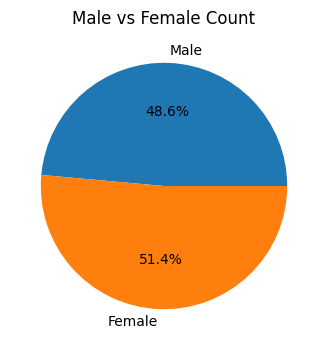

In [14]:
#plot pie chart for male female count where male:1 female:0
male_count = len(df[df['SEX'] == True])
female_count = len(df[df['SEX'] == False])

# plot pie chart
plt.figure(figsize=(4, 4))
plt.pie([male_count, female_count], labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Male vs Female Count')
#plt.savefig('male_female_count.png')
plt.show()
